# Problem statement

Bank campaign dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, \
    preprocessing, metrics, pipeline, tree, ensemble

from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions

%matplotlib inline

In [9]:
df = pd.read_csv("/data/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


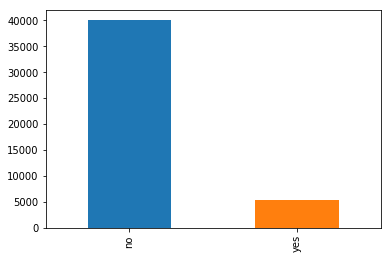

In [10]:
df.y.value_counts().plot.bar()

In [11]:
df.y.value_counts()/len(df.y)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [12]:
y = np.where(df.y == "yes", 1, 0)
X = pd.get_dummies(df.iloc[:, :-1])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                    test_size = 0.3, random_state = 1) 

In [13]:
pd.Series(y_train).value_counts()/len(y_train)

0    0.881885
1    0.118115
dtype: float64

In [14]:
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth=3))
])
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred))
est = pipe.steps[-1][1]

Accuracy 0.9019463285166618


In [15]:
pd.DataFrame({"feture": X.columns, 
            "importance": est.feature_importances_})\
.sort_values("importance", ascending = False)

,feture,importance
3,duration,0.606017
49,poutcome_success,0.336646
0,age,0.051436
32,contact_cellular,0.005901
38,month_feb,0.000000
28,housing_no,0.000000
29,housing_yes,0.000000
30,loan_no,0.000000
31,loan_yes,0.000000
33,contact_telephone,0.000000


In [22]:
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("est", ensemble.RandomForestClassifier(max_depth=10, random_state=1))
])
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred))
est = pipe.steps[-1][1]

Accuracy 0.8981126511353583


In [24]:
pd.DataFrame({"feture": X.columns, 
            "importance": est.feature_importances_})\
.sort_values("importance", ascending = False)

,feture,importance
3,duration,0.352952
49,poutcome_success,0.112020
0,age,0.046848
50,poutcome_unknown,0.043220
2,day,0.040855
5,pdays,0.038424
1,balance,0.036197
45,month_oct,0.026519
28,housing_no,0.024517
29,housing_yes,0.023240
